In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv',sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.shape

(284807, 31)

In [7]:
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0.1)
var.fit(df.drop(columns=['Class']))

VarianceThreshold(threshold=0.1)

In [11]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [12]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

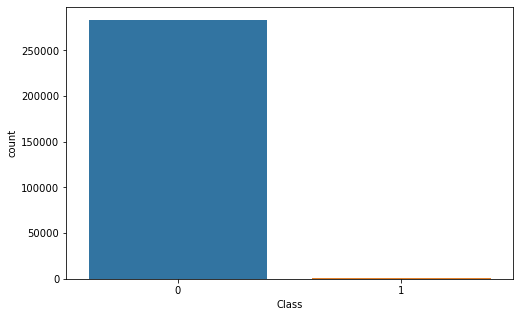

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(df['Class'])
plt.show()

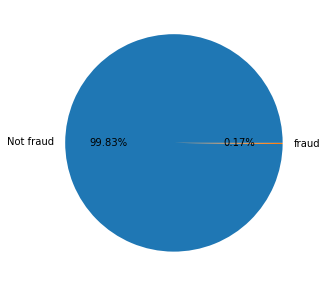

************************************************


0    99.83329
1     0.16671
Name: Class, dtype: float64

In [14]:
freq = df['Class'].value_counts().tolist()
label = ['Not fraud','fraud']
plt.figure(figsize=(5,5))
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.show()
print('************************************************')
df['Class'].value_counts()/df.shape[0]*100

In [15]:
timedelta = pd.to_timedelta(df['Time'],unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df.drop(columns=['Time'],inplace=True)

In [16]:
df.to_csv('card_fraud_data.csv',index=False)

<h5>Analyzing 'Time_hour' variable

In [17]:
unique_timestamps = df['Time_hour'].value_counts()
print('Total unique timestamps(hours) in the data:', unique_timestamps.shape[0])
print('% of data having unique timestamps(hours) :',unique_timestamps.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top frequent timestamps(hours)')
print(unique_timestamps.head())

Total unique timestamps(hours) in the data: 24
% of data having unique timestamps(hours) : 0.008458865243227622
***************************************************
Top frequent timestamps(hours)
21    17629
18    16959
11    16781
20    16705
10    16548
Name: Time_hour, dtype: int64


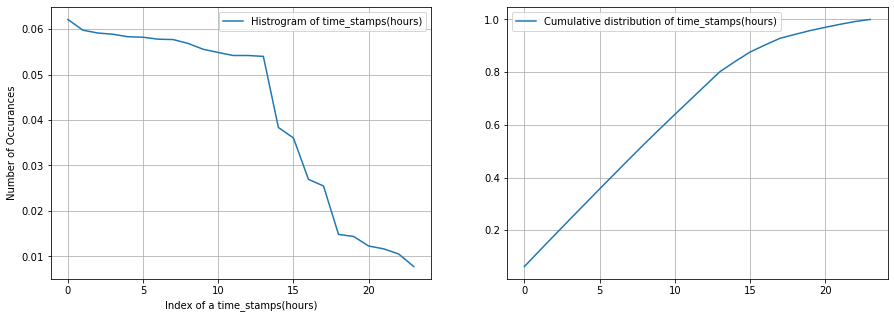

In [18]:
s = sum(unique_timestamps.values);
h = unique_timestamps.values/s;
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h, label="Histrogram of time_stamps(hours)")
plt.xlabel('Index of a time_stamps(hours)')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()

c = np.cumsum(h)
plt.subplot(1, 2, 2)
plt.plot(c,label='Cumulative distribution of time_stamps(hours)')
plt.grid()
plt.legend()
plt.show()

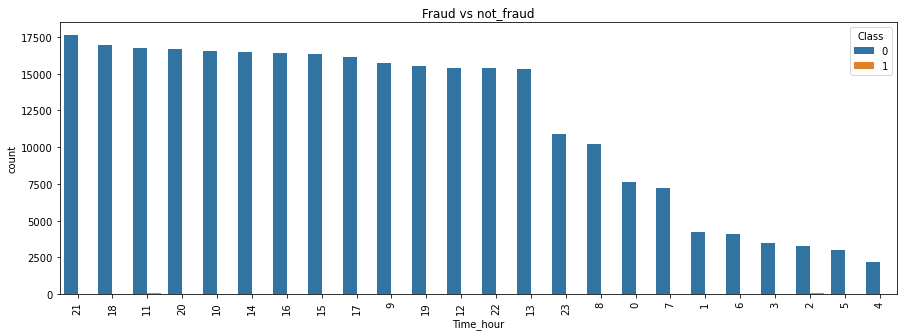

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='Time_hour',hue='Class', order=unique_timestamps.index.tolist(),data=df)
plt.title('Fraud vs not_fraud')
plt.xticks(rotation=90)
plt.show()

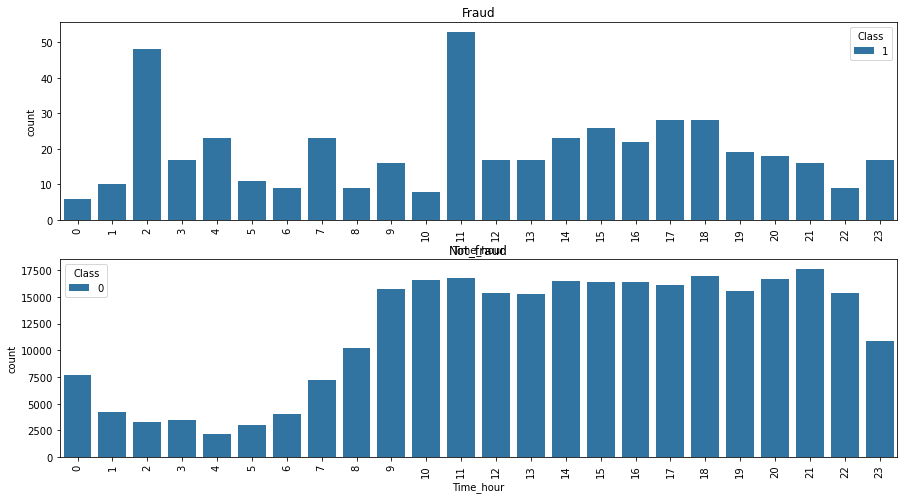

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
sns.countplot(x='Time_hour',hue='Class',data=df[df['Class'] == 1])
plt.title('Fraud')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x='Time_hour',hue='Class',data=df[df['Class'] == 0])
plt.title('Not_fraud')
plt.xticks(rotation=90)
plt.show()

In [21]:
unique_timestamps1 = df[df['Class'] == 1]['Time_hour'].value_counts()
unique_timestamps0 = df[df['Class'] == 0]['Time_hour'].value_counts()

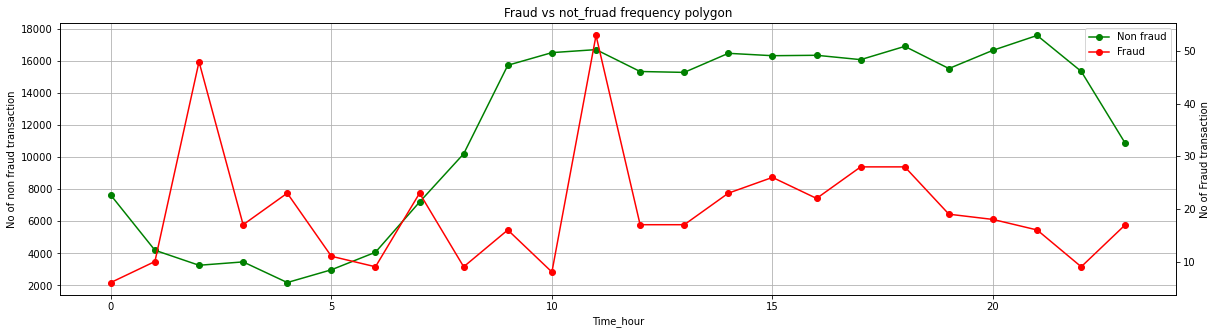

In [22]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(unique_timestamps0.sort_index().index.tolist(),unique_timestamps0.sort_index().values.tolist(), 'o-', color="green")
ax2.plot(unique_timestamps1.sort_index().index.tolist(), unique_timestamps1.sort_index().values.tolist(), 'o-', color="red")
ax1.set_xlabel('Time_hour')
ax2.legend(handles=[a.lines[0] for a in [ax1,ax2]], labels=['Non fraud', 'Fraud'])
ax1.set_ylabel('No of non fraud transaction')
ax2.set_ylabel('No of Fraud transaction')
ax1.grid()
plt.title('Fraud vs not_fruad frequency polygon')
plt.show()

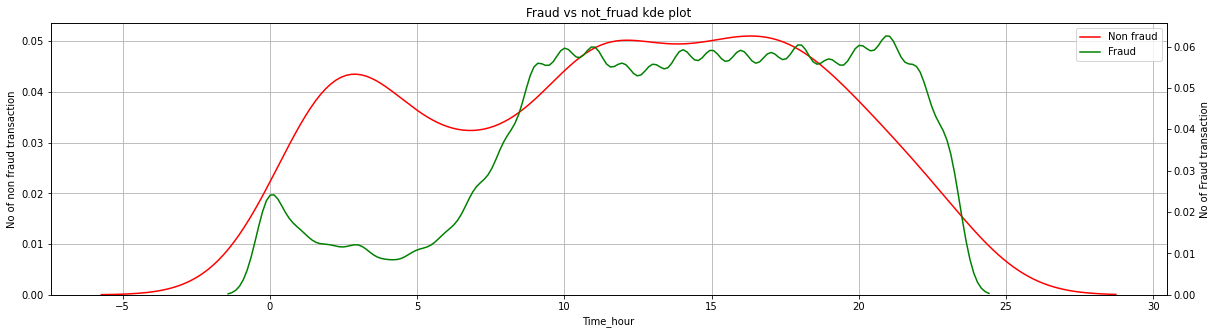

In [23]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 
sns.kdeplot(x='Time_hour',data=df[df['Class'] == 1],ax = ax1,color='r')
sns.kdeplot(x='Time_hour',data=df[df['Class'] == 0], ax = ax2,color='g')
ax1.set_xlabel('Time_hour')
ax2.legend(handles=[a.lines[0] for a in [ax1,ax2]], labels=['Non fraud', 'Fraud'])
ax1.set_ylabel('No of non fraud transaction')
ax2.set_ylabel('No of Fraud transaction')
ax1.grid()
plt.title('Fraud vs not_fruad kde plot')
plt.show()

In [24]:
print('Skewness of kde plot:')
print(df[df['Class'] == 0]['Time_hour'].skew())
print(df[df['Class'] == 1]['Time_hour'].skew())

Skewness of kde plot:
-0.4904536079664733
-0.1044455640332582


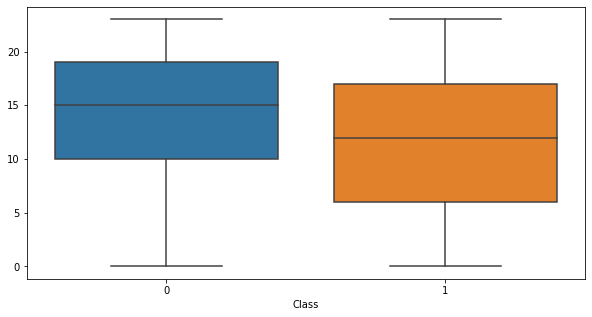

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class',y=pd.factorize(df['Time_hour'])[0],data=df)
plt.show()

In [26]:
print('For fraud cases:')
print(df[df['Class'] == 1]['Time_hour'].describe())
print('***********************************************')
print('For not fraud cases:')
print(df[df['Class'] == 0]['Time_hour'].describe())

For fraud cases:
count    473.000000
mean      11.655391
std        6.544636
min        0.000000
25%        6.000000
50%       12.000000
75%       17.000000
max       23.000000
Name: Time_hour, dtype: float64
***********************************************
For not fraud cases:
count    283253.000000
mean         14.049638
std           5.832753
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: Time_hour, dtype: float64


In [27]:
temp = pd.crosstab(index=df['Time_hour'],columns=df['Class'],normalize='columns')
temp['diff'] = (abs(temp[0] - temp[1]))/temp.T.max()
temp.sort_values(1,ascending=False).head()

Class,0,1,diff
Time_hour,,,
11,0.059057,0.112051,0.472946
2,0.011509,0.101480,0.886587
18,0.059773,0.059197,0.009650
17,0.056847,0.059197,0.039697
15,0.057715,0.054968,0.047594


In [28]:
temp.sort_values('diff',ascending=False).head()

Class,0,1,diff
Time_hour,,,
2,0.011509,0.101480,0.886587
4,0.007700,0.048626,0.841651
10,0.058393,0.016913,0.710354
3,0.012251,0.035941,0.659147
22,0.054259,0.019027,0.649321


<h5>Analyzing 'Time_min' variable

In [29]:
unique_time_min = df['Time_min'].value_counts()
print('Total unique timestamps(minutes) in the data:', unique_time_min.shape[0])
print('% of data having unique timestamps(minutes) :',unique_time_min.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top frequent timestamps(minutes)')
print(unique_time_min.head())

Total unique timestamps(minutes) in the data: 60
% of data having unique timestamps(minutes) : 0.021147163108069054
***************************************************
Top frequent timestamps(minutes)
0    5430
2    5408
3    5233
4    5210
1    5120
Name: Time_min, dtype: int64


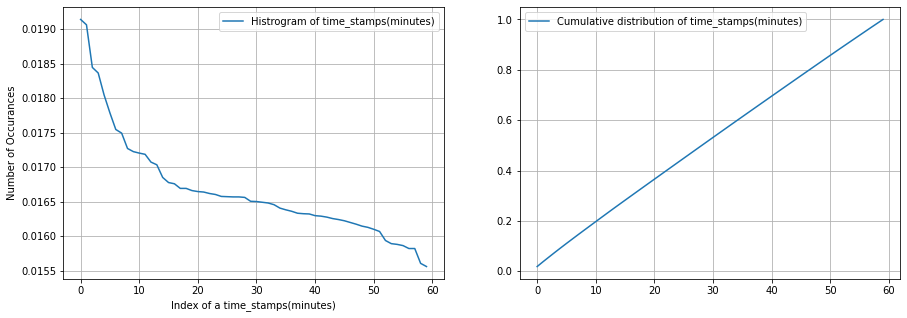

In [30]:
s = sum(unique_time_min.values);
h = unique_time_min.values/s;
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h, label="Histrogram of time_stamps(minutes)")
plt.xlabel('Index of a time_stamps(minutes)')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()

c = np.cumsum(h)
plt.subplot(1, 2, 2)
plt.plot(c,label='Cumulative distribution of time_stamps(minutes)')
plt.grid()
plt.legend()
plt.show()

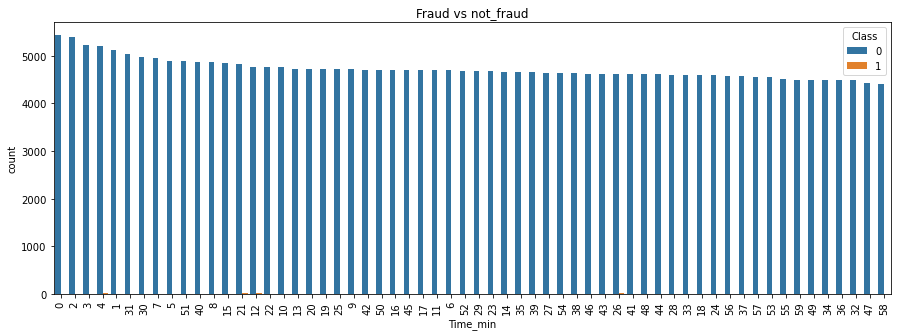

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x='Time_min',hue='Class', order=unique_time_min.index.tolist(),data=df)
plt.title('Fraud vs not_fraud')
plt.xticks(rotation=90)
plt.show()

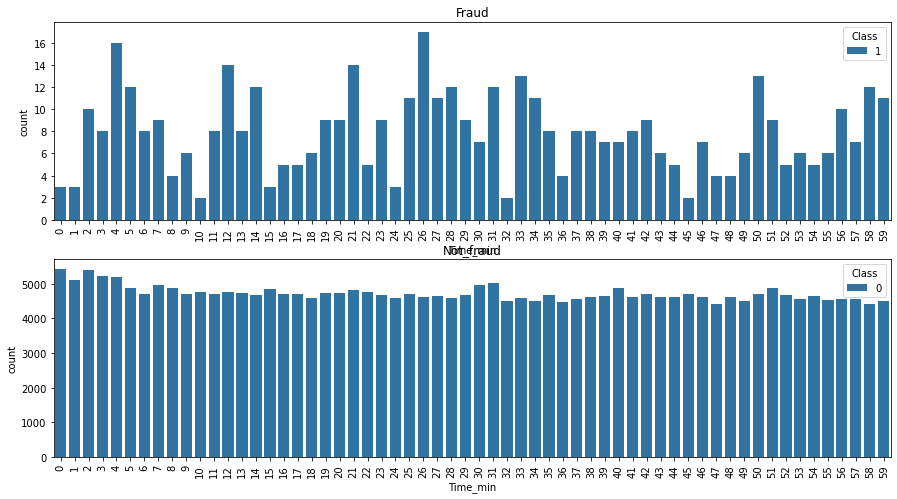

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
sns.countplot(x='Time_min',hue='Class',data=df[df['Class'] == 1])
plt.title('Fraud')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x='Time_min',hue='Class',data=df[df['Class'] == 0])
plt.title('Not_fraud')
plt.xticks(rotation=90)
plt.show()

In [33]:
unique_timestamps1 = df[df['Class'] == 1]['Time_min'].value_counts()
unique_timestamps0 = df[df['Class'] == 0]['Time_min'].value_counts()

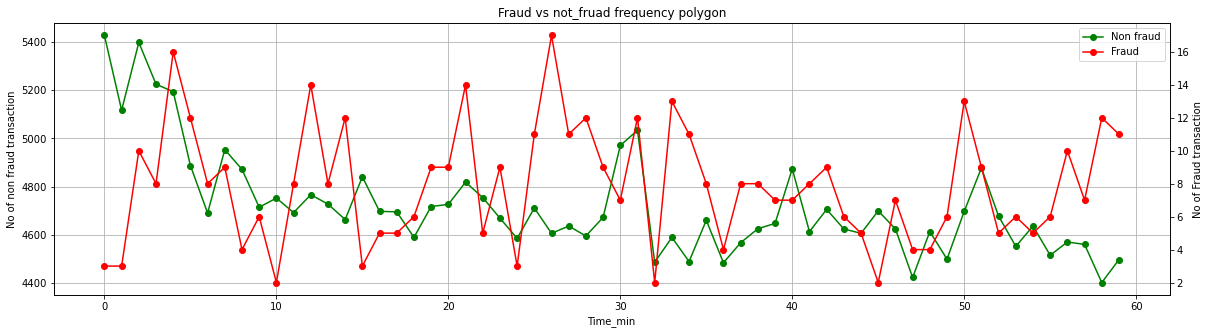

In [34]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(unique_timestamps0.sort_index().index.tolist(),unique_timestamps0.sort_index().values.tolist(), 'o-', color="green")
ax2.plot(unique_timestamps1.sort_index().index.tolist(), unique_timestamps1.sort_index().values.tolist(), 'o-', color="red")
ax1.set_xlabel('Time_min')
ax2.legend(handles=[a.lines[0] for a in [ax1,ax2]], labels=['Non fraud', 'Fraud'])
ax1.set_ylabel('No of non fraud transaction')
ax2.set_ylabel('No of Fraud transaction')
ax1.grid()
plt.title('Fraud vs not_fruad frequency polygon')
plt.show()

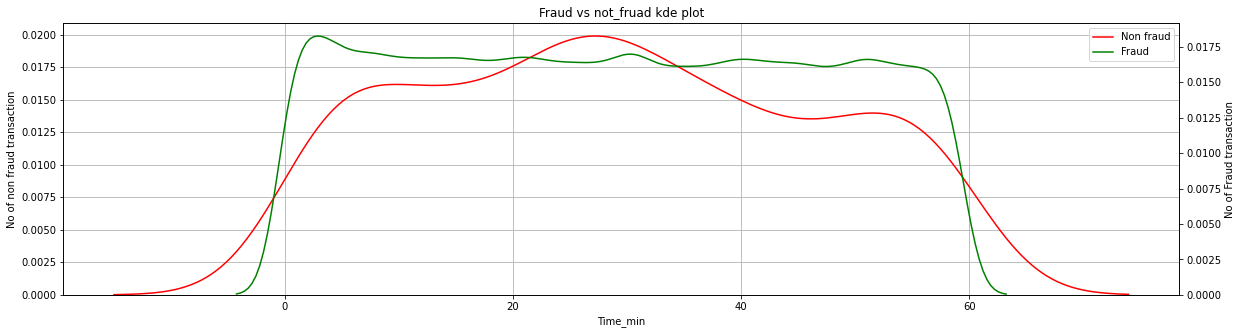

In [35]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 
sns.kdeplot(x='Time_min',data=df[df['Class'] == 1],ax = ax1,color='r')
sns.kdeplot(x='Time_min',data=df[df['Class'] == 0], ax = ax2,color='g')
ax1.set_xlabel('Time_min')
ax2.legend(handles=[a.lines[0] for a in [ax1,ax2]], labels=['Non fraud', 'Fraud'])
ax1.set_ylabel('No of non fraud transaction')
ax2.set_ylabel('No of Fraud transaction')
ax1.grid()
plt.title('Fraud vs not_fruad kde plot')
plt.show()

In [36]:
print('Skewness of kde plot:')
print(df[df['Class'] == 0]['Time_min'].skew())
print(df[df['Class'] == 1]['Time_min'].skew())

Skewness of kde plot:
0.022851056076948584
0.10345307086063753


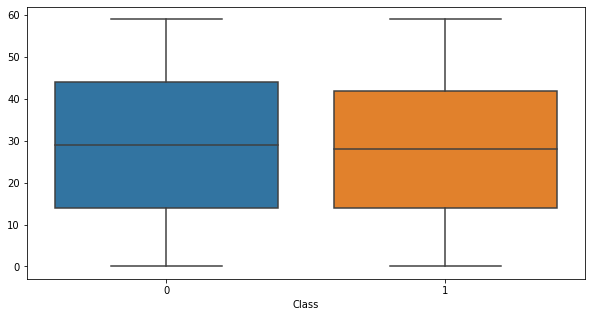

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class',y=pd.factorize(df['Time_min'])[0],data=df)
plt.show()

In [38]:
print('For fraud cases:')
print(df[df['Class'] == 1]['Time_min'].describe())
print('***********************************************')
print('For not fraud cases:')
print(df[df['Class'] == 0]['Time_min'].describe())

For fraud cases:
count    473.000000
mean      29.103594
std       17.118104
min        0.000000
25%       14.000000
50%       28.000000
75%       42.000000
max       59.000000
Name: Time_min, dtype: float64
***********************************************
For not fraud cases:
count    283253.000000
mean         28.997610
std          17.427416
min           0.000000
25%          14.000000
50%          29.000000
75%          44.000000
max          59.000000
Name: Time_min, dtype: float64


In [39]:
temp = pd.crosstab(index=df['Time_min'],columns=df['Class'],normalize='columns')
temp['diff'] = abs(temp[0] - temp[1])/temp.T.max()
temp.sort_values(1,ascending=False).head()

Class,0,1,diff
Time_min,,,
26,0.016265,0.035941,0.547461
4,0.018337,0.033827,0.457914
21,0.017013,0.029598,0.425202
12,0.016829,0.029598,0.431404
50,0.016586,0.027484,0.396529


In [40]:
temp.sort_values('diff',ascending=False).head()

Class,0,1,diff
Time_min,,,
10,0.016780,0.004228,0.748014
45,0.016593,0.004228,0.745173
32,0.015841,0.004228,0.733076
0,0.019160,0.006342,0.668964
1,0.018065,0.006342,0.648909


<h5>Analyzing 'Amount' variable

In [41]:
unique_Amount = df['Amount'].value_counts()
print('Total unique Amount in the data:', unique_Amount.shape[0])
print('% of data having unique Amount :',unique_Amount.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top frequent Amount')
print(unique_Amount.head())

Total unique Amount in the data: 32767
% of data having unique Amount : 11.548818226034978
***************************************************
Top frequent Amount
1.00     13566
1.98      6044
0.89      4871
9.99      4738
15.00     3280
Name: Amount, dtype: int64


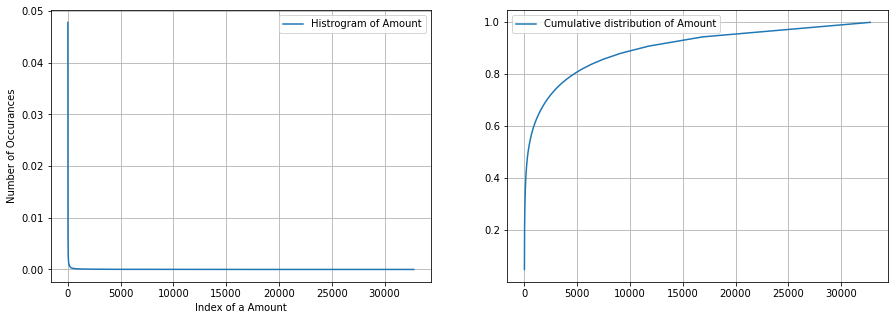

In [42]:
s = sum(unique_Amount.values);
h = unique_Amount.values/s;
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(h, label="Histrogram of Amount")
plt.xlabel('Index of a Amount')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()

c = np.cumsum(h)
plt.subplot(1, 2, 2)
plt.plot(c,label='Cumulative distribution of Amount')
plt.grid()
plt.legend()
plt.show()

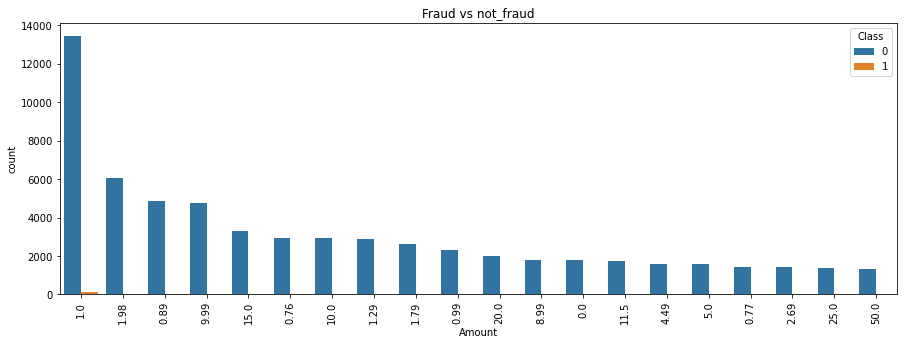

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x='Amount',hue='Class', order=unique_Amount.index.tolist()[:20],data=df)
plt.title('Fraud vs not_fraud')
plt.xticks(rotation=90)
plt.show()

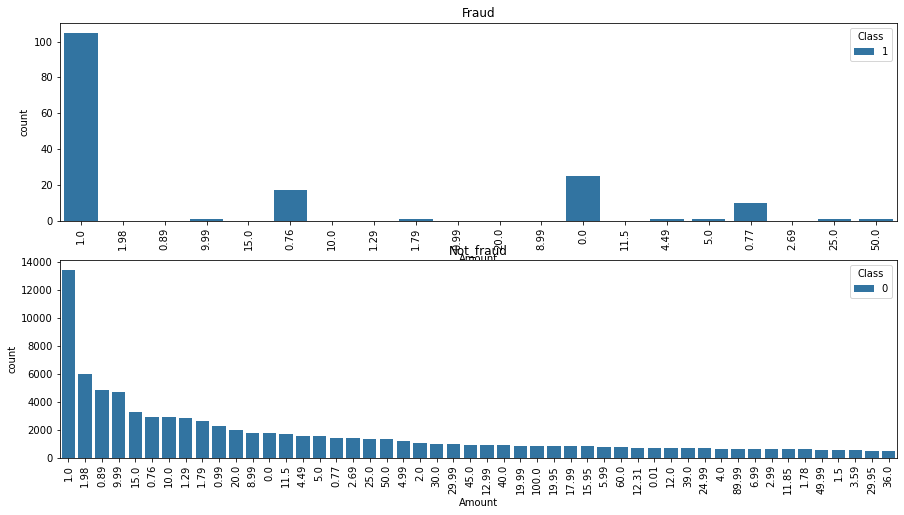

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
sns.countplot(x='Amount',hue='Class', order=unique_Amount.index.tolist()[:20],data=df[df['Class'] == 1])
plt.title('Fraud')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x='Amount',hue='Class', order=unique_Amount.index.tolist()[:50],data=df[df['Class'] == 0])
plt.title('Not_fraud')
plt.xticks(rotation=90)
plt.show()

In [45]:
unique_timestamps1 = df[df['Class'] == 1]['Time_min'].value_counts().head(20)
unique_timestamps0 = df[df['Class'] == 0]['Time_min'].value_counts().head(20)

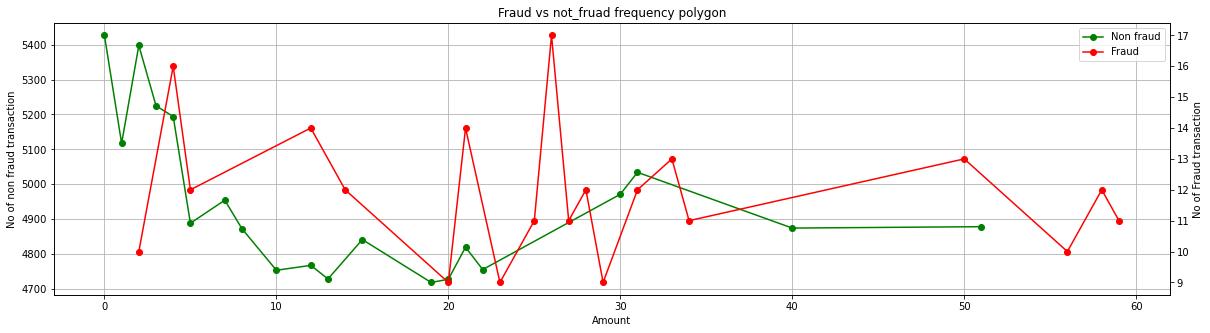

In [46]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(unique_timestamps0.sort_index().index.tolist(),unique_timestamps0.sort_index().values.tolist(), 'o-', color="green")
ax2.plot(unique_timestamps1.sort_index().index.tolist(), unique_timestamps1.sort_index().values.tolist(), 'o-', color="red")
ax1.set_xlabel('Amount')
ax2.legend(handles=[a.lines[0] for a in [ax1,ax2]], labels=['Non fraud', 'Fraud'])
ax1.set_ylabel('No of non fraud transaction')
ax2.set_ylabel('No of Fraud transaction')
ax1.grid()
plt.title('Fraud vs not_fruad frequency polygon')
plt.show()

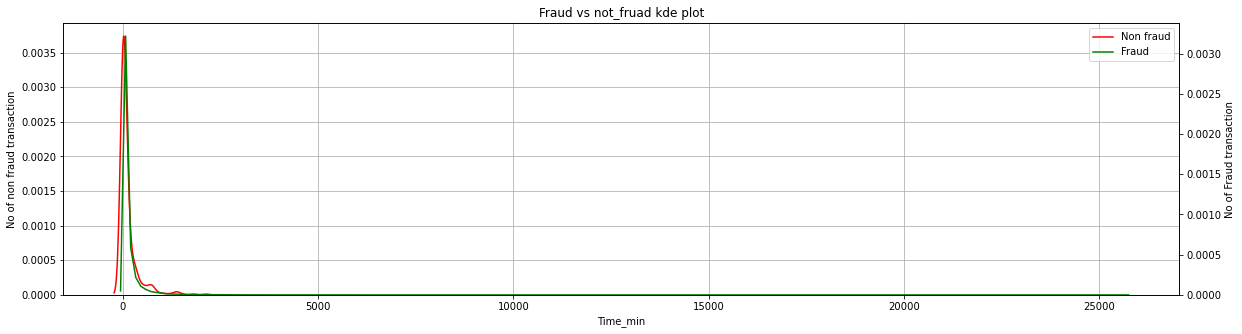

In [47]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 
sns.kdeplot(x='Amount',data=df[df['Class'] == 1],ax = ax1,color='r')
sns.kdeplot(x='Amount',data=df[df['Class'] == 0], ax = ax2,color='g')
ax1.set_xlabel('Time_min')
ax2.legend(handles=[a.lines[0] for a in [ax1,ax2]], labels=['Non fraud', 'Fraud'])
ax1.set_ylabel('No of non fraud transaction')
ax2.set_ylabel('No of Fraud transaction')
ax1.grid()
plt.title('Fraud vs not_fruad kde plot')
plt.show()

In [48]:
print('Skewness of kde plot:')
print(df[df['Class'] == 0]['Amount'].skew())
print(df[df['Class'] == 1]['Amount'].skew())

Skewness of kde plot:
17.00431964020145
3.7244782527095226


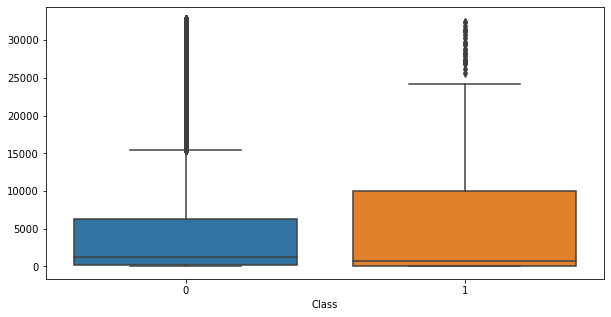

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class',y=pd.factorize(df['Amount'])[0],data=df)
plt.show()

In [50]:
print('For fraud cases:')
print(df[df['Class'] == 1]['Amount'].describe())
print('***********************************************')
print('For not fraud cases:')
print(df[df['Class'] == 0]['Amount'].describe())

For fraud cases:
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
***********************************************
For not fraud cases:
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


In [51]:
temp = pd.crosstab(index=df['Amount'],columns=df['Class'],normalize='columns')
temp['diff'] = (abs(temp[0] - temp[1]))/temp.T.max()
temp.sort_values(1,ascending=False).head()

Class,0,1,diff
Amount,,,
1.00,0.047523,0.221987,0.785921
99.99,0.001070,0.057082,0.981260
0.00,0.006295,0.052854,0.880904
0.76,0.010450,0.035941,0.709244
0.77,0.005059,0.021142,0.760705


In [52]:
temp.sort_values('diff',ascending=False).head()

Class,0,1,diff
Amount,,,
194.26,0.000004,0.0,1.0
318.25,0.000004,0.0,1.0
318.64,0.000004,0.0,1.0
318.62,0.000004,0.0,1.0
318.61,0.000004,0.0,1.0


#From above we can say that few fraud transaction were of very big amount therefore deviating the mean and not the median

<h5>Analyzing other variables

In [53]:
col = df.columns.tolist()[:28]
col

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

For column : V1


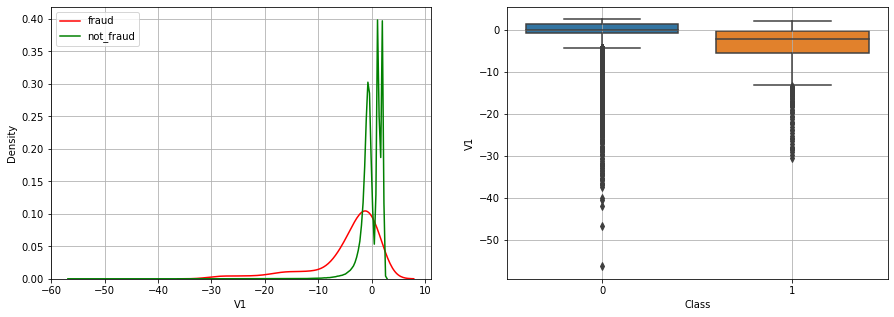

****************************************************************************************************************

For column : V2


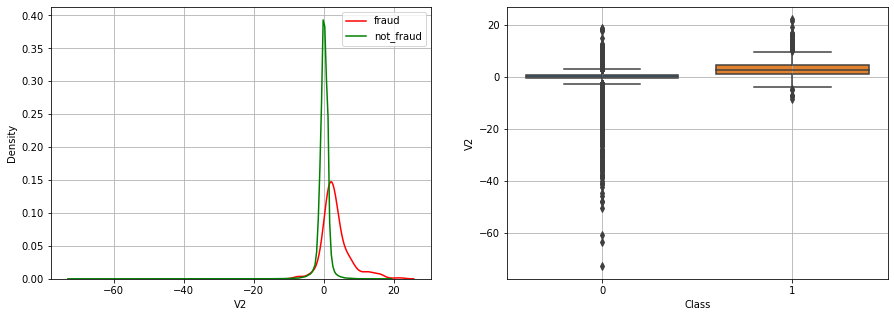

****************************************************************************************************************

For column : V3


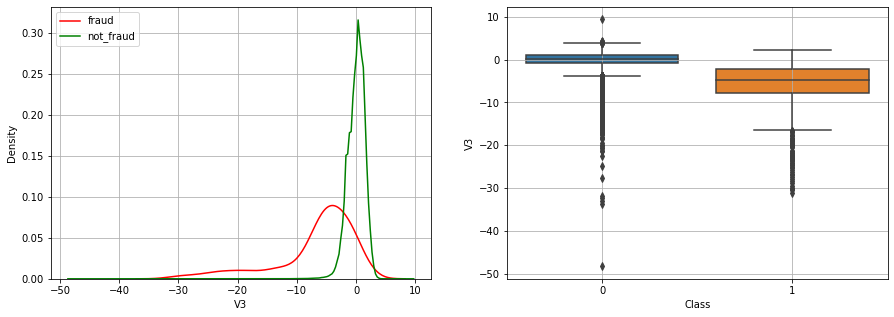

****************************************************************************************************************

For column : V4


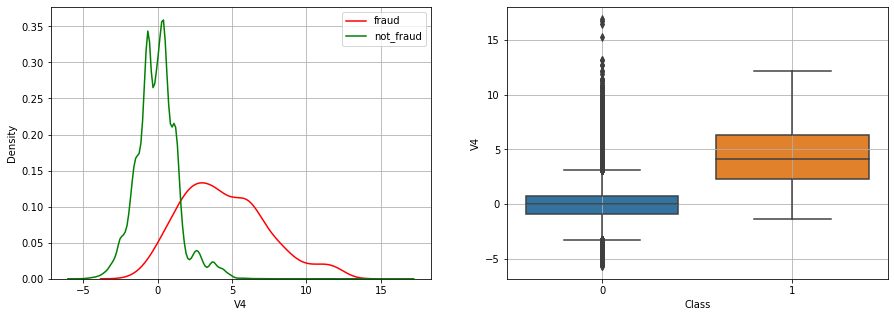

****************************************************************************************************************

For column : V5


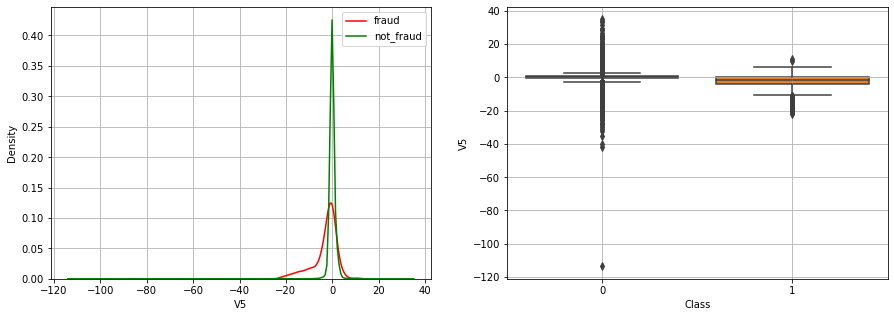

****************************************************************************************************************

For column : V6


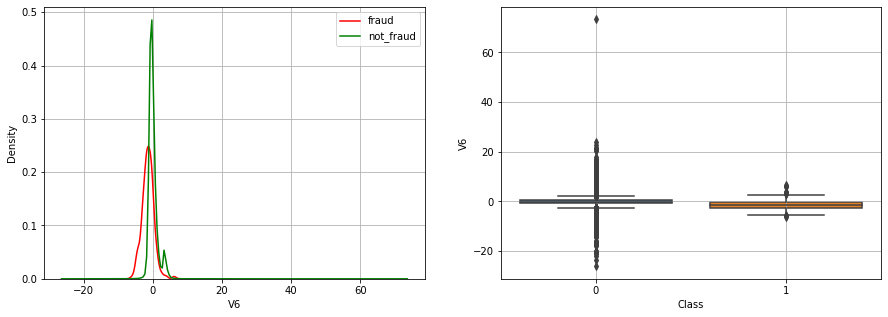

****************************************************************************************************************

For column : V7


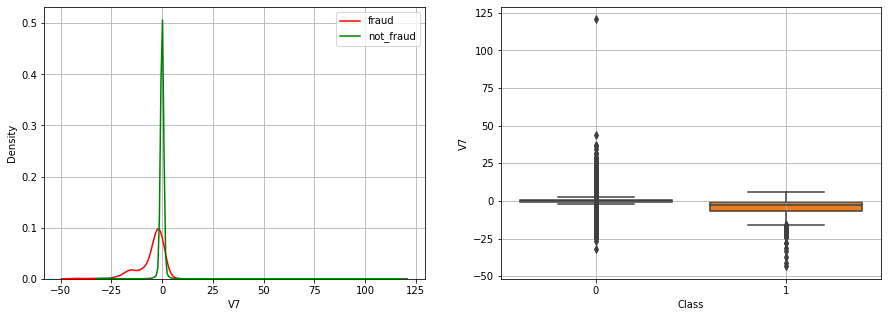

****************************************************************************************************************

For column : V8


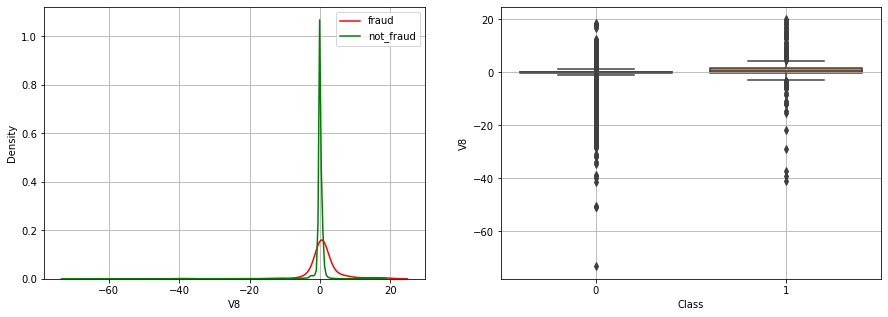

****************************************************************************************************************

For column : V9


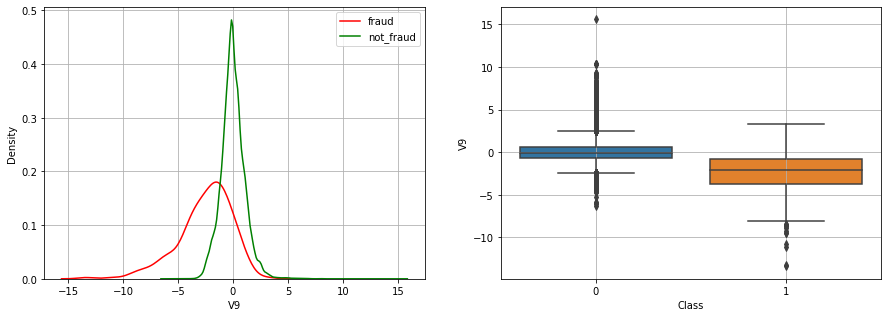

****************************************************************************************************************

For column : V10


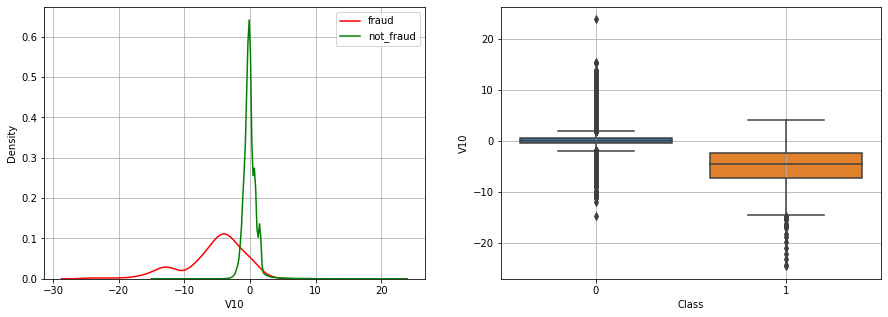

****************************************************************************************************************

For column : V11


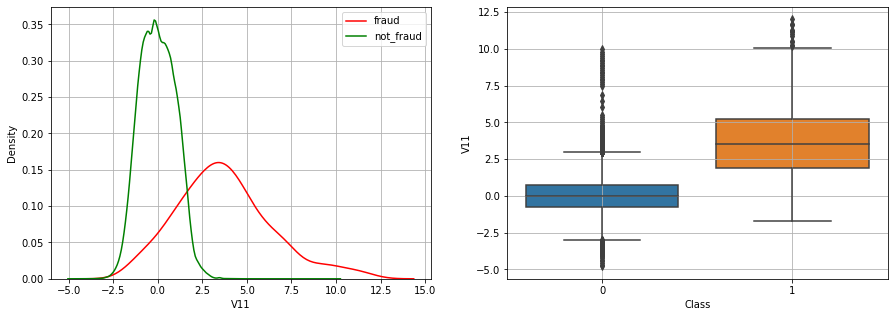

****************************************************************************************************************

For column : V12


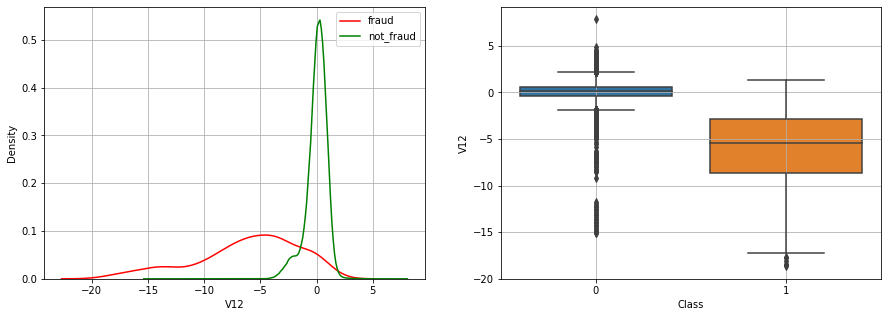

****************************************************************************************************************

For column : V13


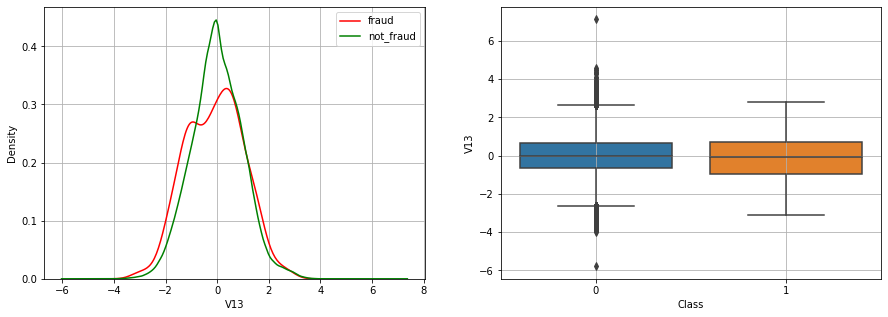

****************************************************************************************************************

For column : V14


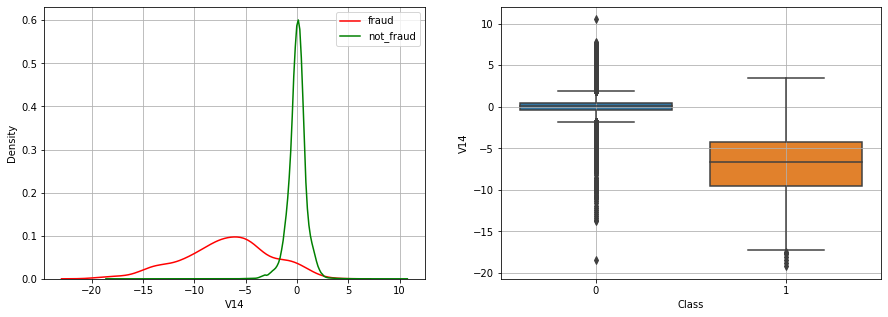

****************************************************************************************************************

For column : V15


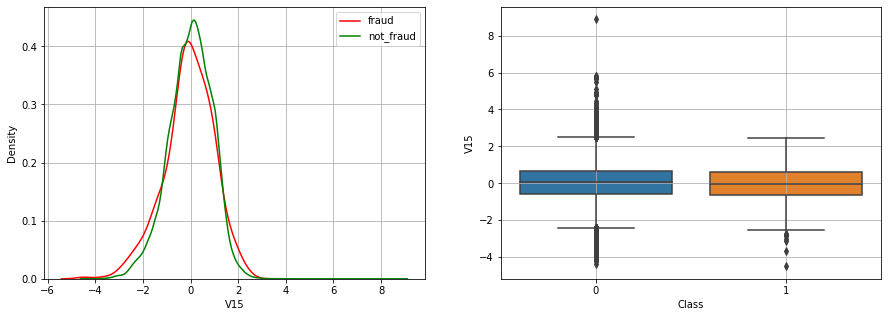

****************************************************************************************************************

For column : V16


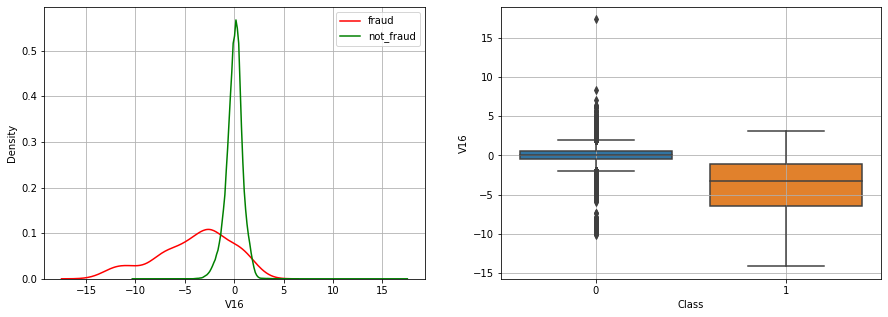

****************************************************************************************************************

For column : V17


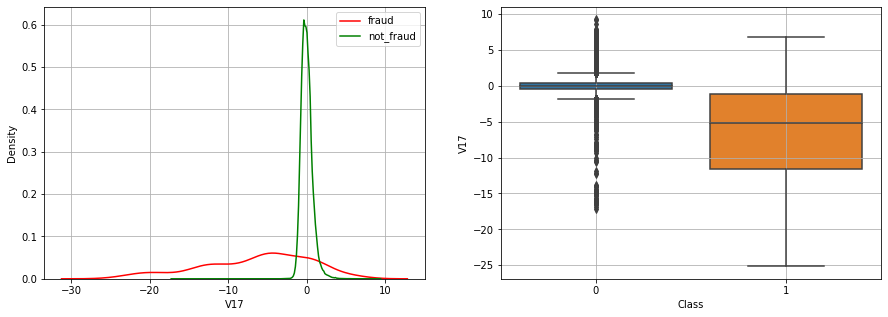

****************************************************************************************************************

For column : V18


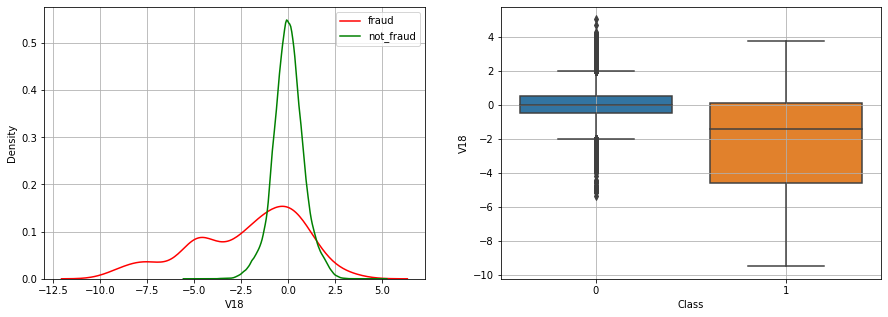

****************************************************************************************************************

For column : V19


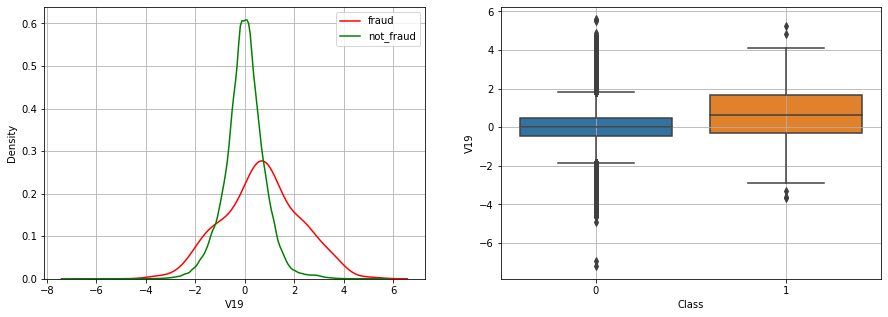

****************************************************************************************************************

For column : V20


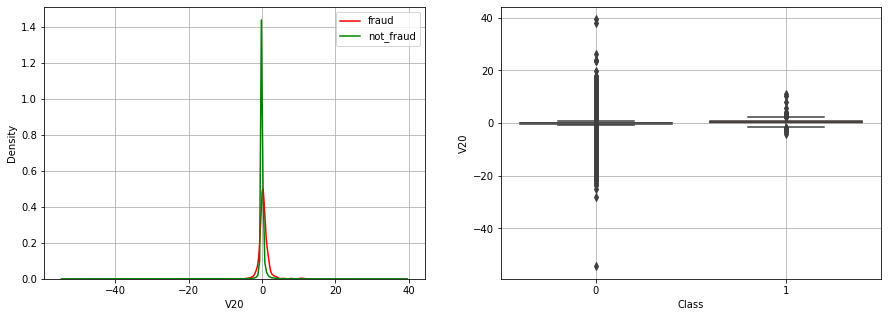

****************************************************************************************************************

For column : V21


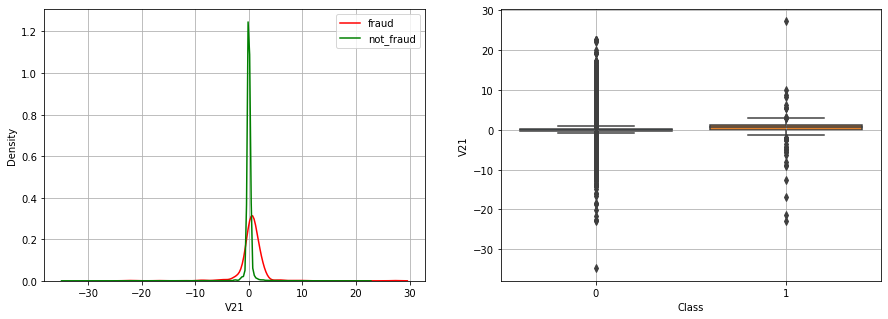

****************************************************************************************************************

For column : V22


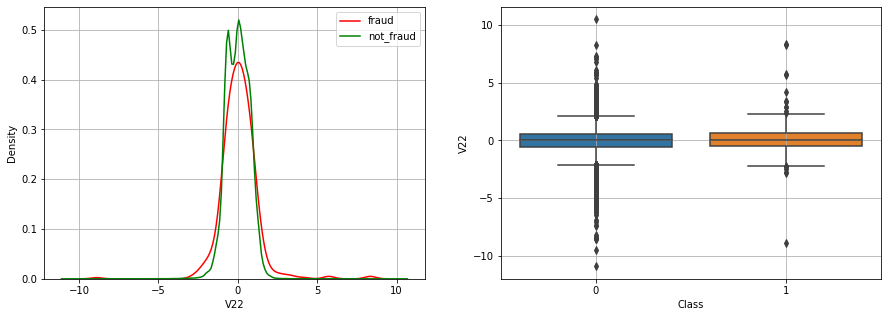

****************************************************************************************************************

For column : V23


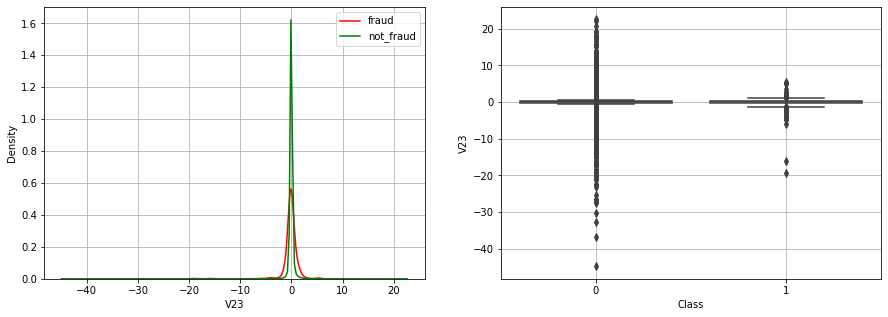

****************************************************************************************************************

For column : V24


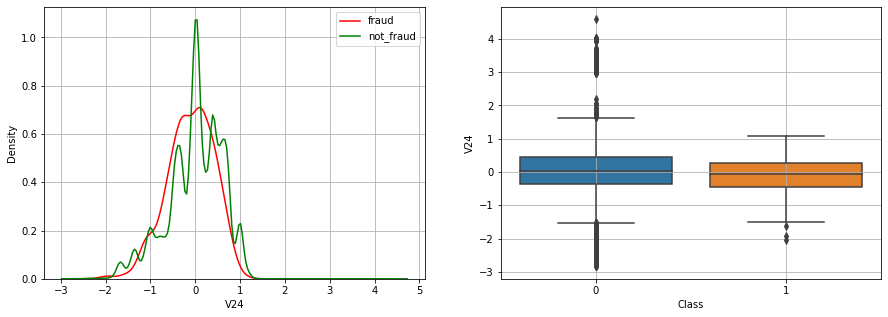

****************************************************************************************************************

For column : V25


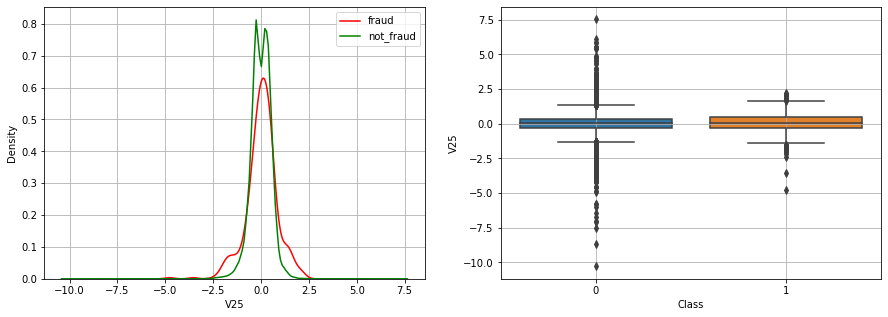

****************************************************************************************************************

For column : V26


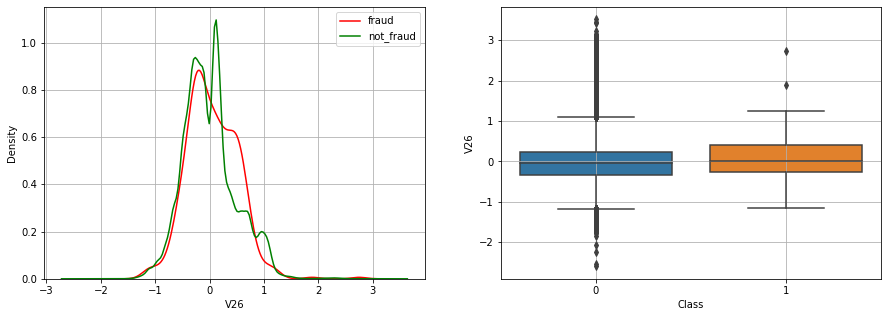

****************************************************************************************************************

For column : V27


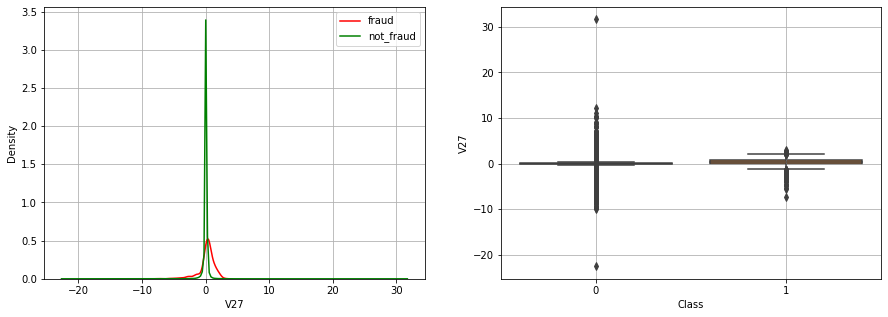

****************************************************************************************************************

For column : V28


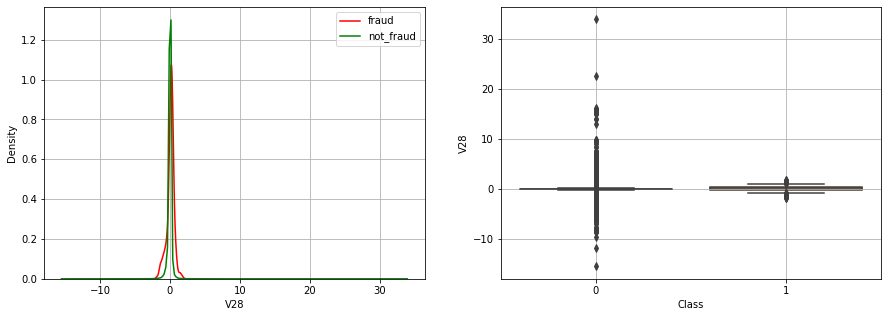

****************************************************************************************************************



In [54]:
for i in range(len(col)):
    print('For column :',col[i])
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax1 = sns.kdeplot(x=col[i],data=df[df['Class'] == 1],color='r',label='fraud')
    ax2 = sns.kdeplot(x=col[i],data=df[df['Class'] == 0],color='g',label='not_fraud')
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Class',y=col[i],data=df)
    plt.grid()
    plt.show()
    print('****************************************************************************************************************\n')

<h3>Many features are redundent since their distributons are not very much seperable as seen from above.Hence features not useful for predication can be removed for reducing the time for training and prediction 

In [60]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour,Time_min
V1,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,...,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486,-0.004949,-0.009692
V2,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,...,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624,0.007929,0.001406
V3,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,...,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322,-0.022645,-0.009504
V4,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,...,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326,-0.035251,-0.003083
V5,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,...,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812,-0.035817,-0.002422
V6,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,...,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915,-0.019417,-0.002854
V7,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,...,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347,-0.010502,0.000709
V8,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,...,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068,0.032706,0.004036
V9,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,...,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021,-0.191132,-0.027537
V10,0.000815,0.000620,-0.009632,0.002753,-0.006050,-0.002180,-0.013617,0.000481,-0.012613,1.000000,...,0.001917,0.000154,-0.000565,0.001089,0.010769,0.009159,-0.102255,-0.206971,0.022776,0.005309


<AxesSubplot:>

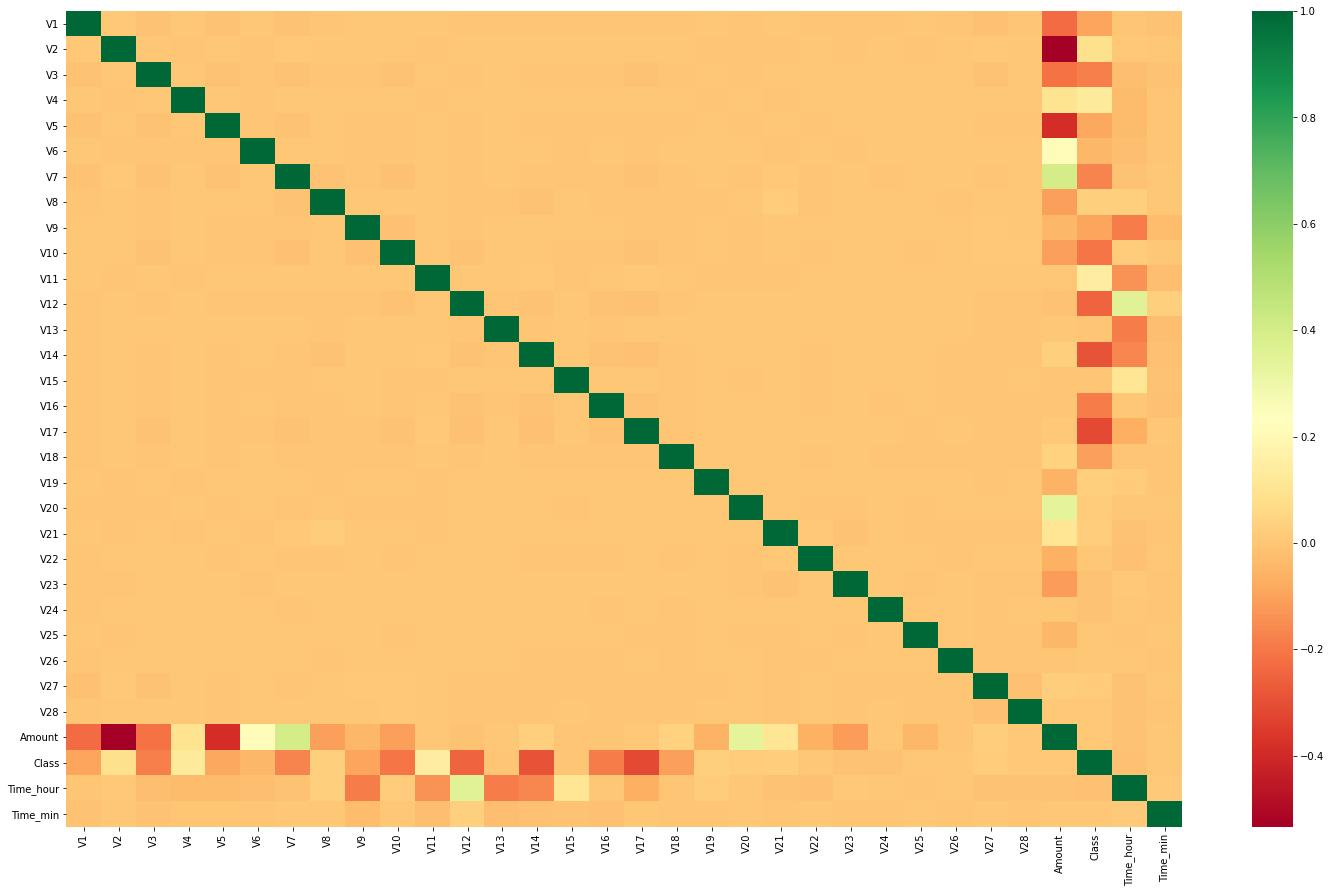

In [65]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),cmap="RdYlGn")